# Bank Churn Prediction

### Using Decision Tree & Random Forest  Classification Algorithms

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
df = pd.read_csv('Bank Customer Data.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# knowing its shape
df.shape

(10000, 12)

In [4]:
# getting its basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# knowing the number of unique values in each feature
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [6]:
# describing the numerical features
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# chceking for duplicate records
df.duplicated().sum()

0

In [8]:
# chceking for null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
# dropping customer_id column
df.drop('customer_id',axis=1,inplace=True)

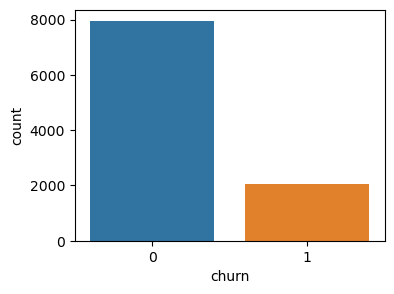

In [11]:
# knowing the counts of classification in churn using countplot
plt.figure(figsize=(4,3))
sns.countplot(x='churn',data=df)
plt.show()

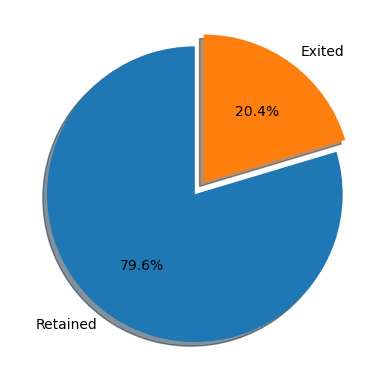

In [14]:
# knowing the percentage of classification in churn using pie chart
churn_count = df['churn'].value_counts()
plt.pie(x=churn_count,explode=(0,0.1),labels=['Retained','Exited'],autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

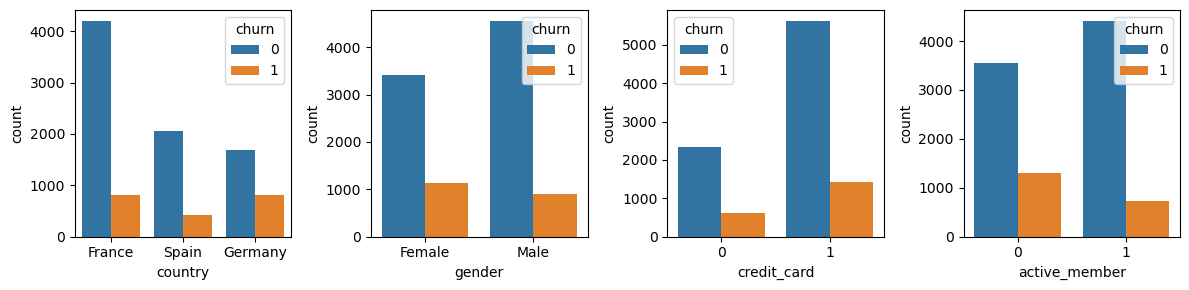

In [17]:
# getting categorical features and knowing its contribution on classification in churn
cat_feature = ['country', 'gender', 'credit_card', 'active_member']

fig, axis = plt.subplots(1,4,figsize=(12,3))

for i,feature in enumerate(cat_feature):
    sns.countplot(x=feature, data=df, hue='churn', ax=axis[i])
    
plt.tight_layout()
plt.show()

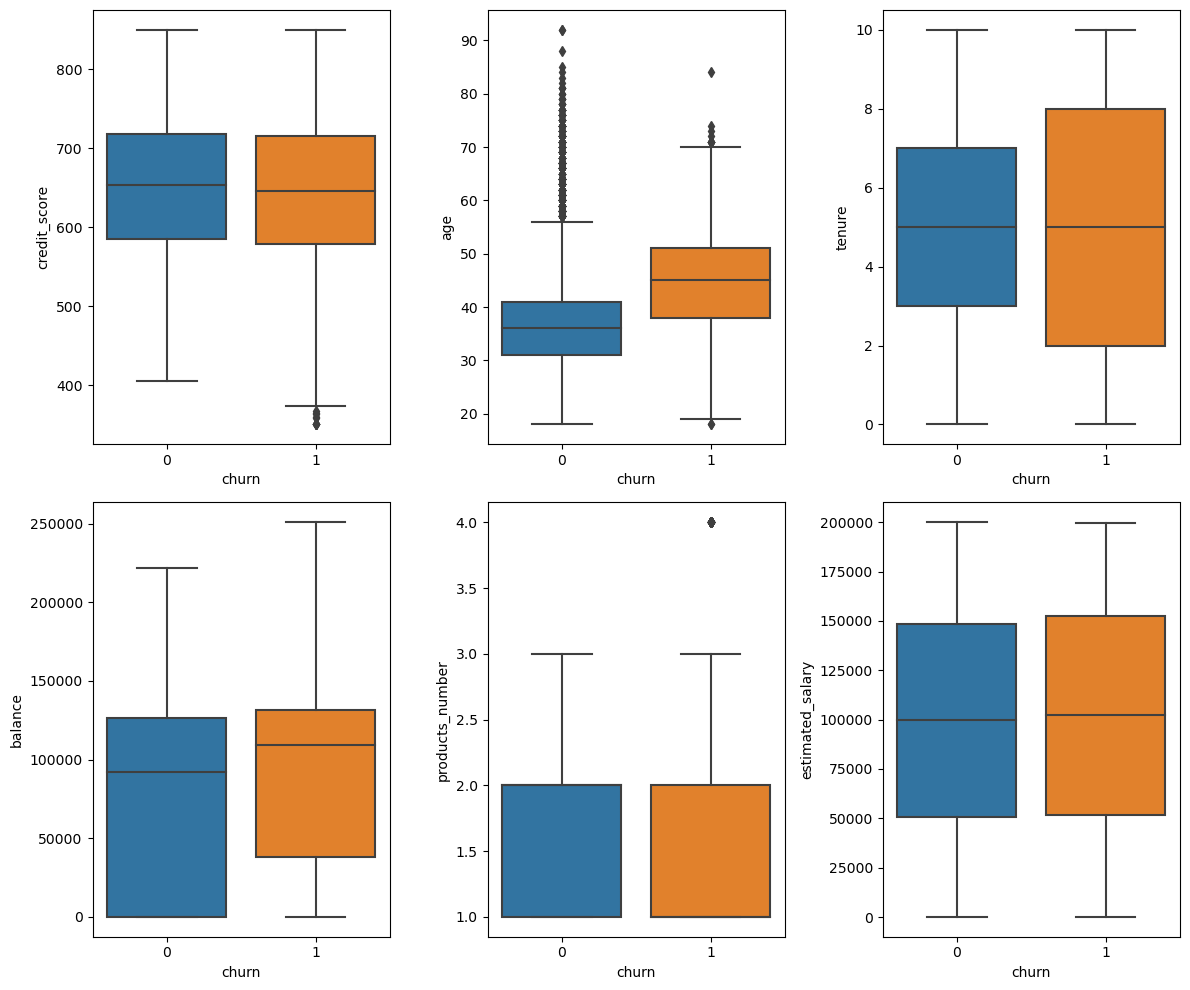

In [21]:
# finding the outliers of numerical features using box plot
num_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

fig, axis = plt.subplots(2,3,figsize=(12,10))
axis = axis.flatten()

for i,feature in enumerate(num_features):
    sns.boxplot(x='churn', y=feature, data=df, ax=axis[i])

plt.tight_layout()
plt.show()

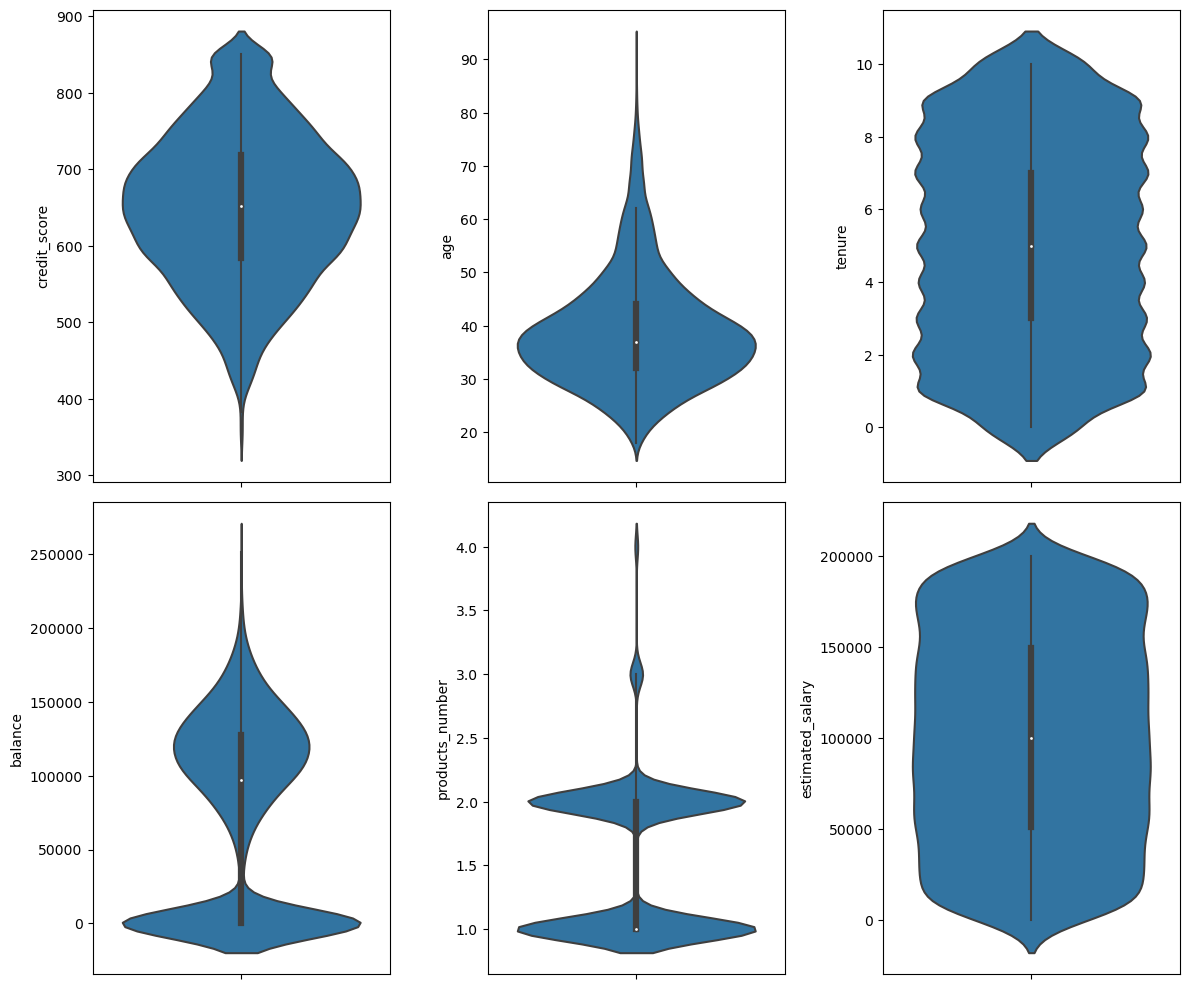

In [23]:
# knowing the distribution of numerical features 
fig, axis = plt.subplots(2,3,figsize=(12,10))
axis = axis.flatten()

for i,feature in enumerate(num_features):
    sns.violinplot( y=feature, data=df, ax=axis[i])

plt.tight_layout()
plt.show()

In [25]:
# features having outliers
outliers_features = ['credit_score', 'age', 'products_number']

In [28]:
# finding outliers using z_score
from scipy import stats
z_score = np.abs(stats.zscore(df[outliers_features]))
threshold = 3
outlier_indices = np.where(z_score>threshold)[0]

In [29]:
# dropping outliers from dataset
df = df.drop(df.index[outlier_indices])

In [30]:
# knowing new shape
df.shape

(9799, 11)

In [35]:
# encoding the categorical features using label encoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['country'] = labelencoder.fit_transform(df['country'])
df['gender'] = labelencoder.fit_transform(df['gender'])

In [37]:
# getting the labeled values
print(f'Country Label: {df["country"].unique()}')
print(f'Gender Label: {df["gender"].unique()}')

Country Label: [0 2 1]
Gender Label: [0 1]


In [38]:
# viewing new form of dataset
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


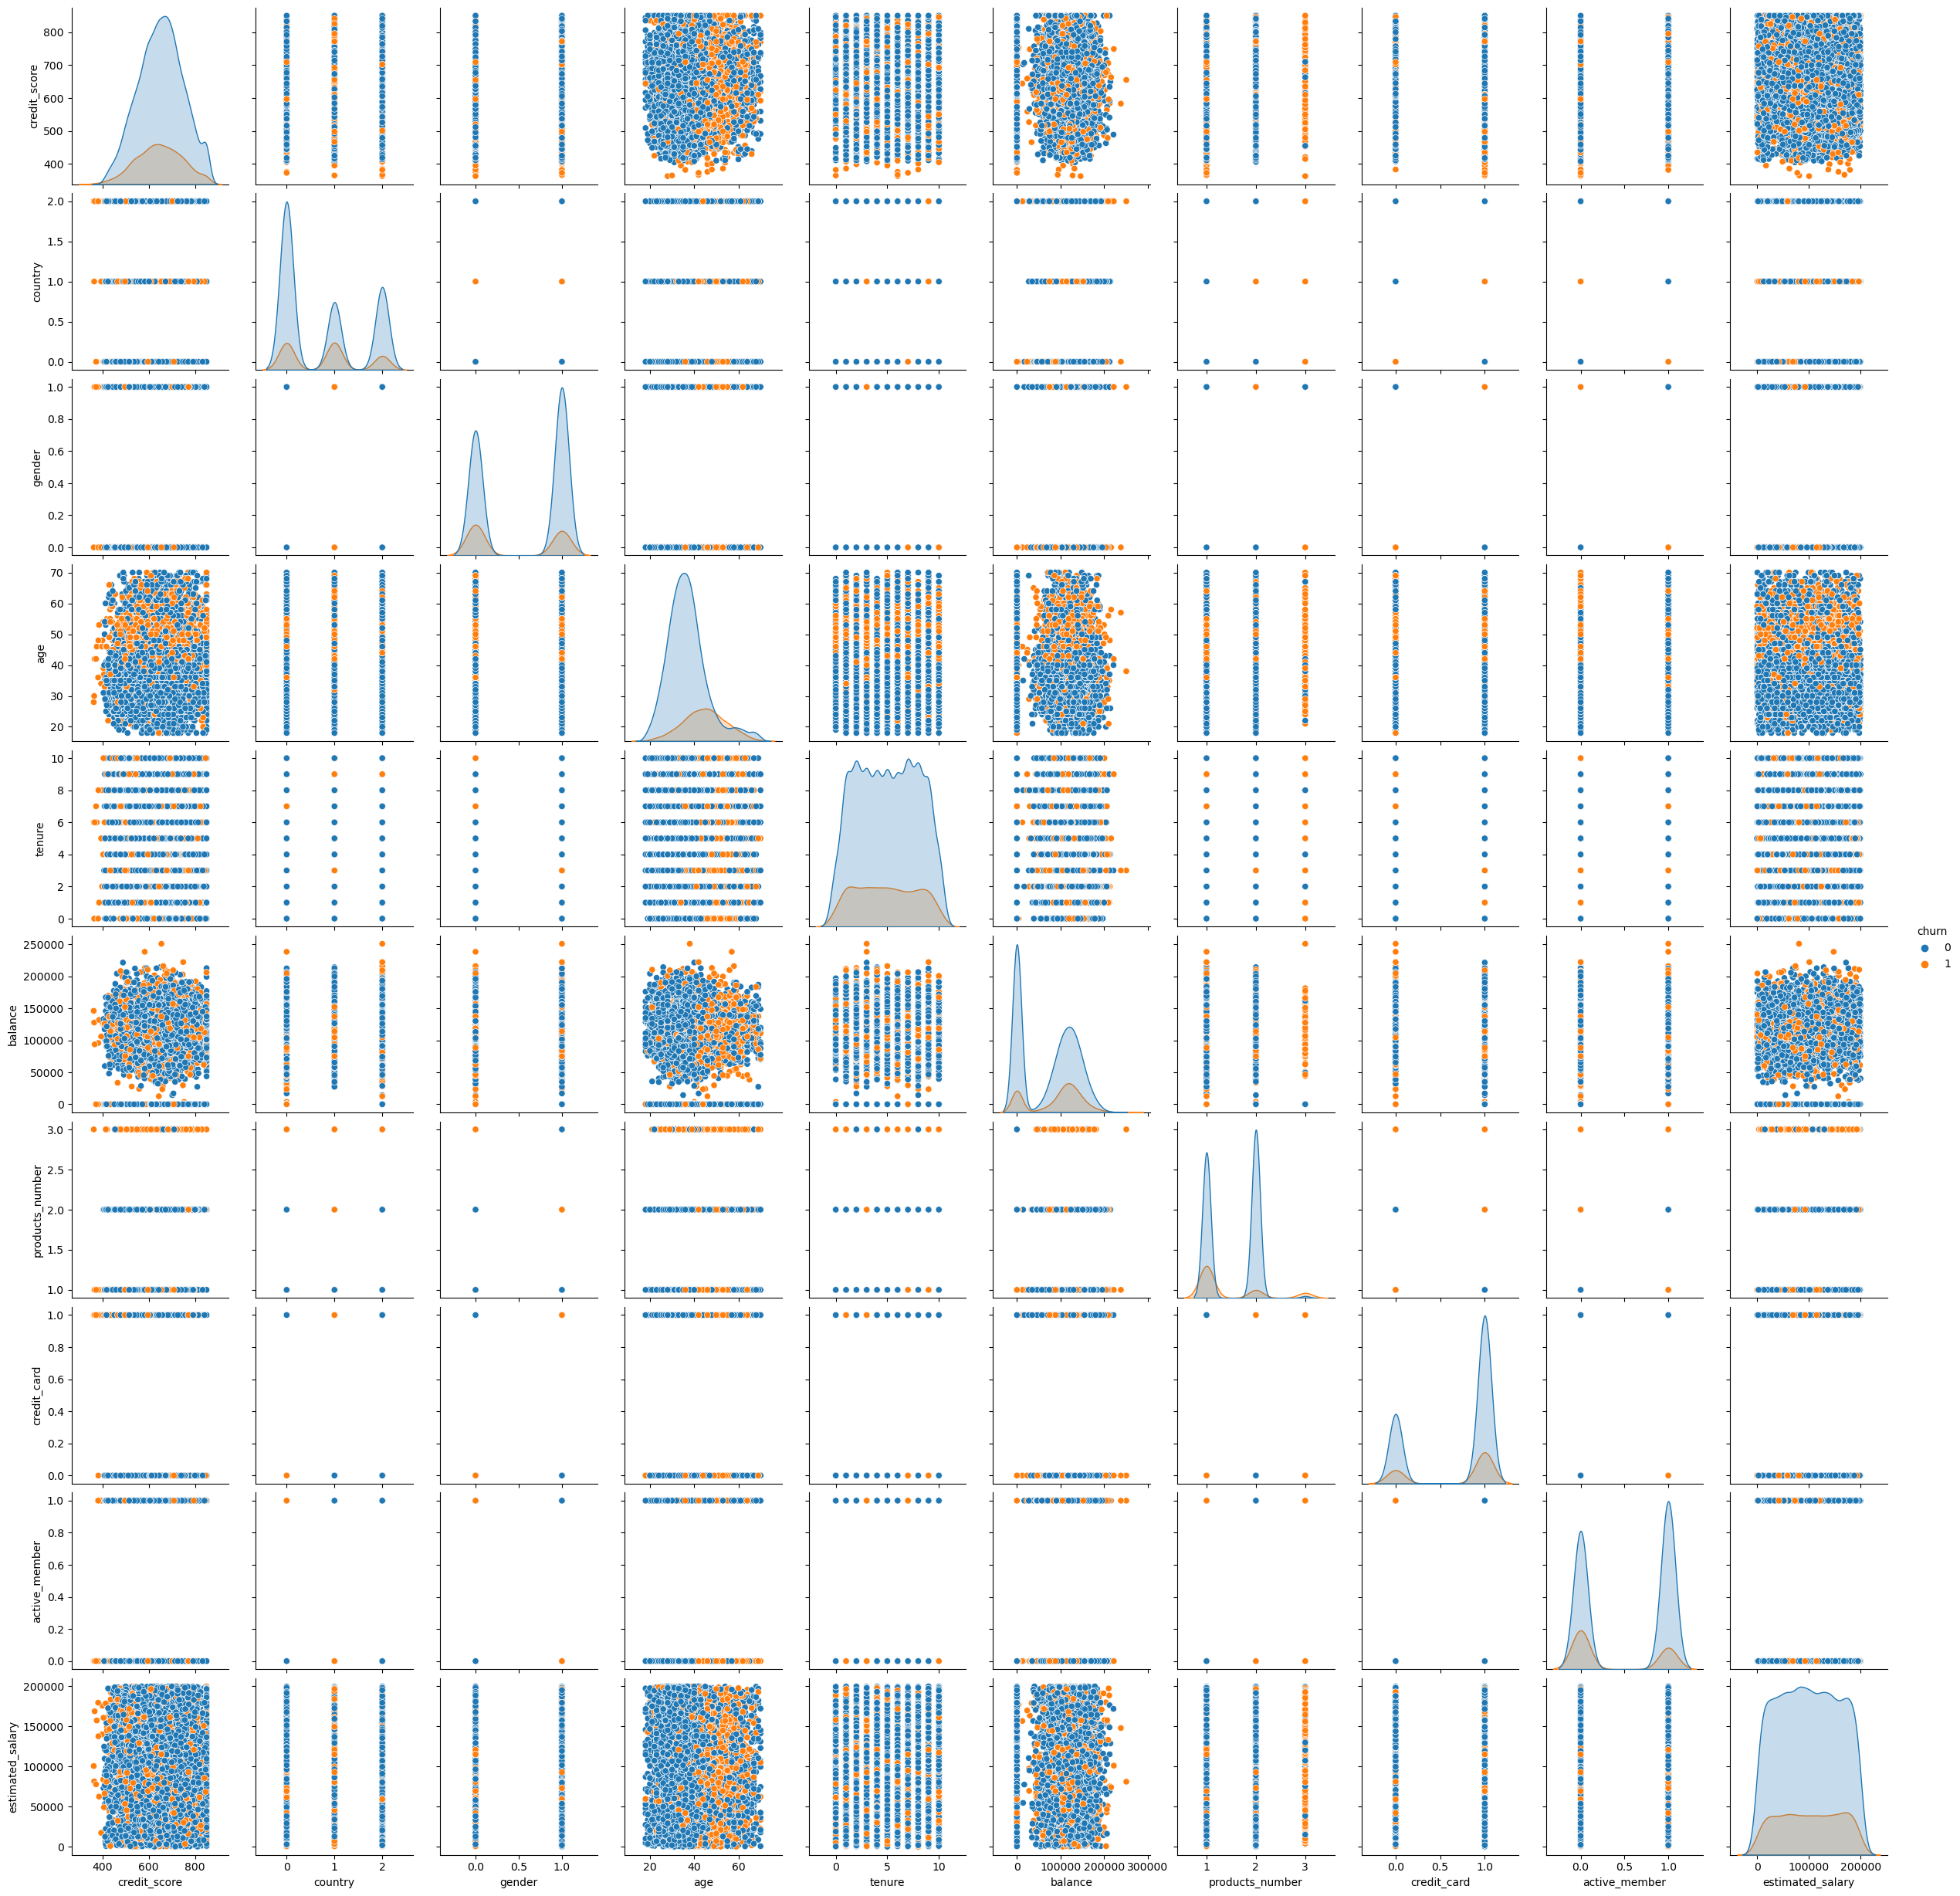

In [39]:
# knowing the relation between each features using pair plot
sns.pairplot(data=df, hue='churn')
plt.show()

In [40]:
# finding the correlation between each features
corr = df.corr()
corr

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.009081,-0.003624,-0.009138,0.000121,0.007141,0.011182,-0.003470,0.024017,0.001757,-0.022232
country,0.009081,1.000000,0.002717,0.029432,0.003516,0.066957,0.009557,-0.010971,0.008960,-0.001472,0.037630
gender,-0.003624,0.002717,1.000000,-0.024347,0.015826,0.012383,-0.012077,0.007037,0.022792,-0.008660,-0.104096
age,-0.009138,0.029432,-0.024347,1.000000,-0.012346,0.037338,-0.054387,-0.014576,0.054287,-0.009026,0.323289
tenure,0.000121,0.003516,0.015826,-0.012346,1.000000,-0.012678,0.012609,0.020854,-0.029281,0.007962,-0.016208
balance,0.007141,0.066957,0.012383,0.037338,-0.012678,1.000000,-0.331017,-0.015886,-0.008225,0.013352,0.116310
products_number,0.011182,0.009557,-0.012077,-0.054387,0.012609,-0.331017,1.000000,0.004119,0.011387,0.012667,-0.106224
credit_card,-0.003470,-0.010971,0.007037,-0.014576,0.020854,-0.015886,0.004119,1.000000,-0.012306,-0.009450,-0.006791
active_member,0.024017,0.008960,0.022792,0.054287,-0.029281,-0.008225,0.011387,-0.012306,1.000000,-0.011210,-0.154019
estimated_salary,0.001757,-0.001472,-0.008660,-0.009026,0.007962,0.013352,0.012667,-0.009450,-0.011210,1.000000,0.009121


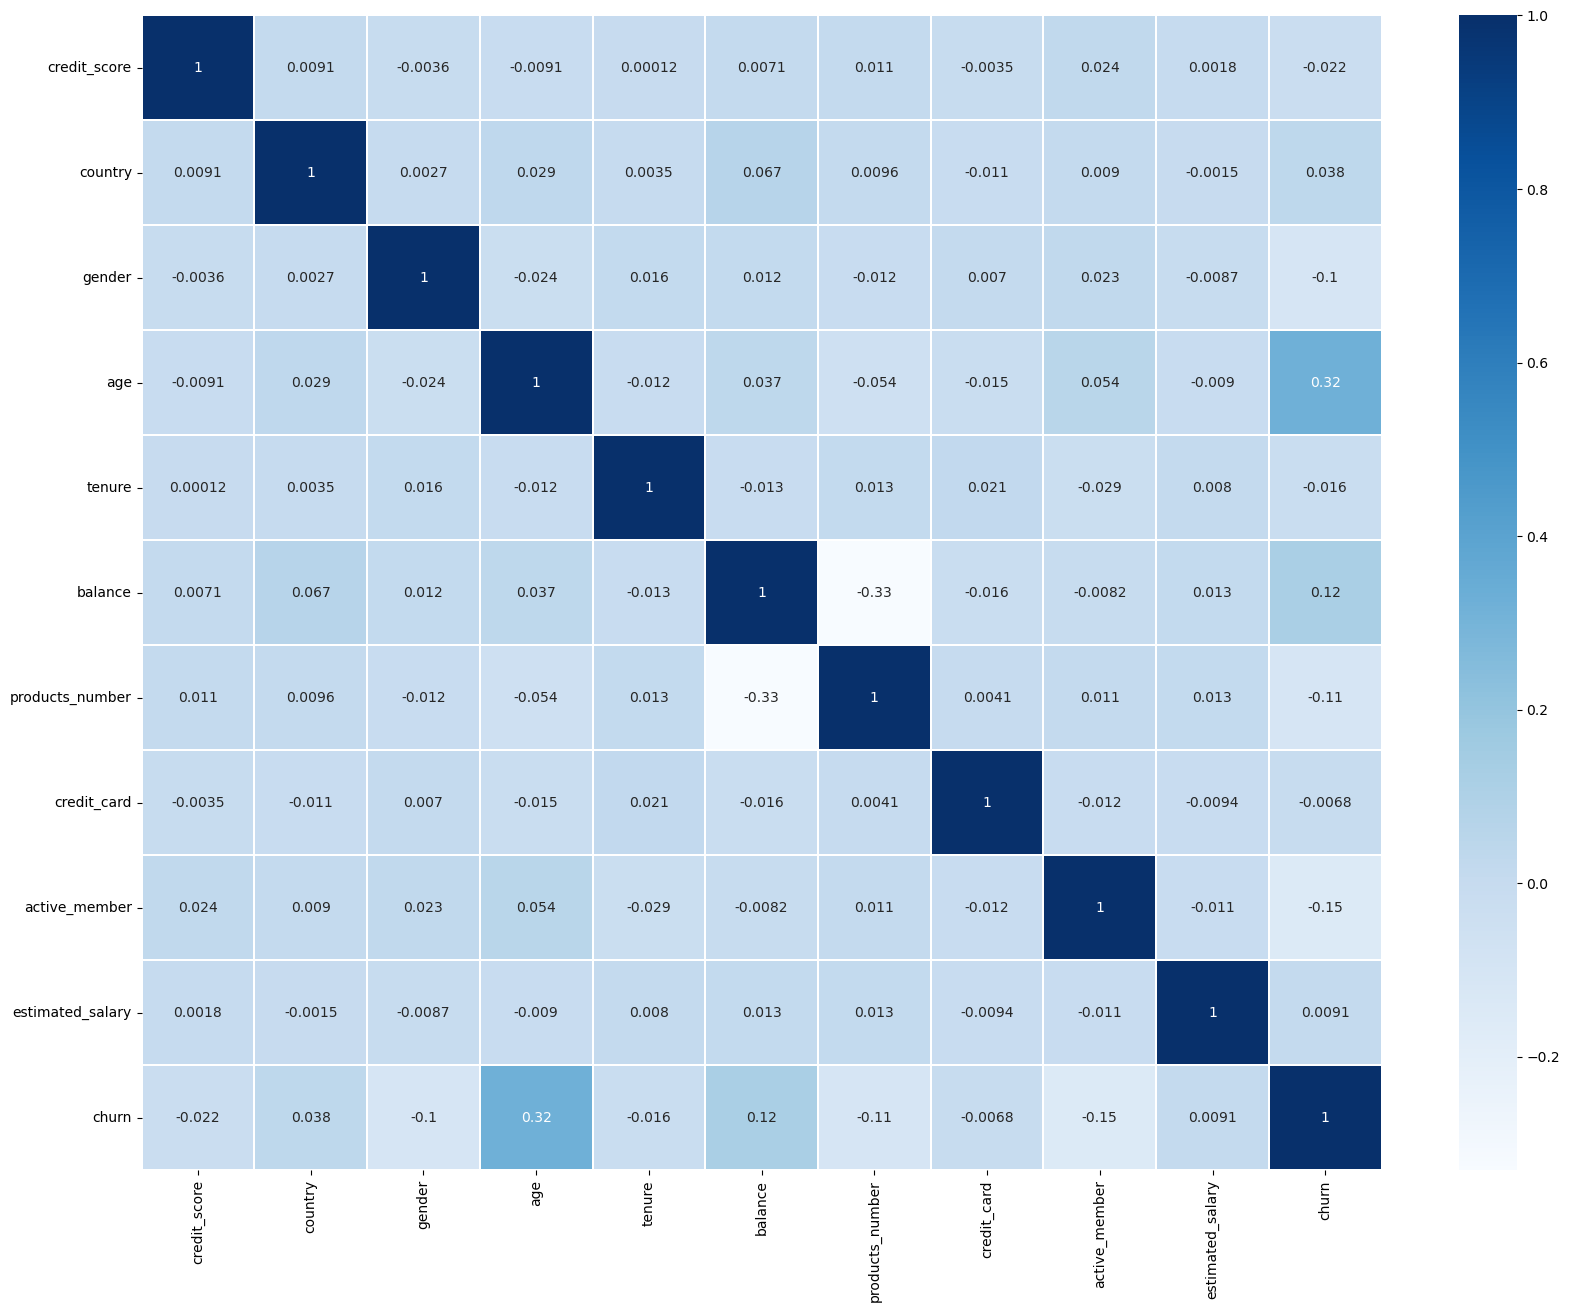

In [42]:
# understanding the correlation between each features using heat map
plt.figure(figsize=(20,15))
sns.heatmap(corr, fmt='.2g', linewidths=0.2, linecolor='white',cmap='Blues', annot=True)
plt.show()

In [43]:
# assigning variable for independent features and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
# spliting data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Decision Tree Classifier

In [49]:
# building ML model with Decision Tree Classifier and Grid Search CV for Hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced',splitter='best')

In [62]:
# setting different decision tree hyperparameters values to find the optimal parameter
dtree_params = {
    'criterion':['gini','entropy'],
    'max_depth':[4,6,8],
    'min_samples_leaf':[1,3,5,7],
    'min_samples_split':[1,3,5],
    'max_features':[None,8,10],
    'random_state':[0,1,42]
}

In [58]:
# importing Stratified K-Fold to work on imbalanced dataset
from sklearn.model_selection import StratifiedKFold
sk_fold = StratifiedKFold(n_splits=5)

In [63]:
# fitting the decision tree model with grid search cv to find optimal parameter
dtree_gsearch = GridSearchCV(estimator=dtree, param_grid=dtree_params, cv=sk_fold, scoring='accuracy')
dtree_gsearch.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'max_features': [None, 8, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5],
                         'random_state': [0, 1, 42]},
             scoring='accuracy')

In [64]:
# getting the decision tree optimal parameter
dtree_gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0}

In [65]:
# knowing the best score of the decision tree optimal model
dtree_gsearch.best_score_

0.7706696182693147

In [68]:
# rebuilding the decision tree model with optimal parameters and fitting the train data
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, 
                               random_state=0, class_weight='balanced')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=8, min_samples_split=3,
                       random_state=0)

In [69]:
# predicting the values of decision tree model using test data
y_dtree_predict = dtree.predict(X_test)

In [73]:
# evaluating the decision tree model by different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print(f'Accuracy Sore: {round(accuracy_score(y_test,y_dtree_predict),3)}')
print(f'Precision Score: {round(precision_score(y_test,y_dtree_predict,average="weighted"),3)}')
print(f'Recall Score: {round(recall_score(y_test,y_dtree_predict,average="weighted"),3)}')
print(f'F1 Score: {round(f1_score(y_test,y_dtree_predict,average="weighted"),3)}')

Accuracy Sore: 0.754
Precision Score: 0.817
Recall Score: 0.754
F1 Score: 0.774


In [74]:
# creating a confusion matrix for decision tree model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_dtree_predict)
print(cm)

[[1831  547]
 [ 176  386]]


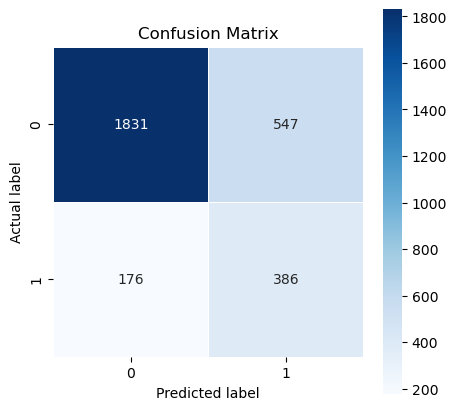

In [78]:
# ploting the confusion matrix of decision tree model using heat map
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square = True, cmap='Blues', fmt='.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# finding the performance of the decision tree model using ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_dtree_predict_proba = dtree.predict_proba(X_test)[:][:,1]

df_dtree_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                        pd.DataFrame(y_dtree_predict_proba, columns=['y_dtree_predict_proba'])], axis=1)

df_dtree_actual_predicted.index = y_test.index

dtree_fpr, dtree_tpr, dtree_tr = roc_curve(df_dtree_actual_predicted['y_actual'], df_dtree_actual_predicted['y_dtree_predict_proba'])

auc = roc_auc_score(df_dtree_actual_predicted['y_actual'], df_dtree_actual_predicted['y_dtree_predict_proba'])

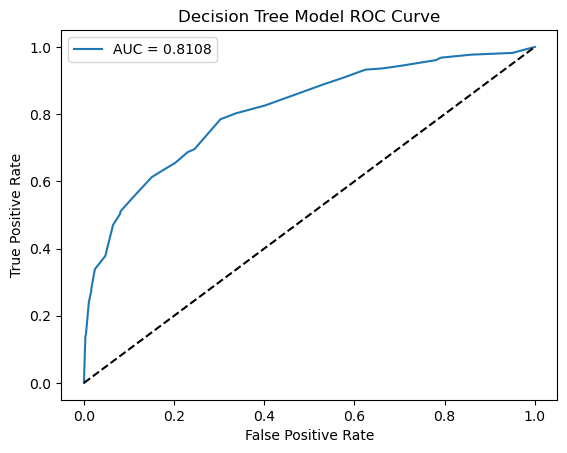

In [89]:
# ploting ROC curve of decision tree model
plt.plot(dtree_fpr, dtree_tpr, label='AUC = %0.4f' %auc)
plt.plot(dtree_fpr, dtree_fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model ROC Curve')
plt.legend()
plt.show()

### Random Forest Classifier

In [90]:
# building another ML model using Random Forest Classifier and Grid Search CV for Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [98]:
# setting different random forest hyperparameters values to find the optimal parameter
rfc_params = {
    'criterion':['gini','entropy'],
    'n_estimators':[100,200],
    'max_depth':[None,5,10],
    'max_features':[None,'sqrt','log2'],
    'random_state':[1,42]
}

In [99]:
# fitting the random forest model with grid search cv to find optimal parameter
rfc_gsearch = GridSearchCV(rfc,rfc_params,cv=sk_fold,scoring='accuracy')
rfc_gsearch.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [1, 42]},
             scoring='accuracy')

In [100]:
# getting the random forest optimal parameter
rfc_gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 200,
 'random_state': 42}

In [101]:
# knowing the best score of the random forest optimal model
rfc_gsearch.best_score_

0.860619708965174

In [105]:
# rebuild the random forest model with optimal parameters and fit the train data
rfc = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=10, max_features=None, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=200, random_state=42)

In [110]:
# predicting the values of random forest model using test data
y_rfc_predict = rfc.predict(X_test)

In [112]:
# evaluating the random forest model by different metrics
print(f'Accuracy Sore: {round(accuracy_score(y_test,y_rfc_predict),3)}')
print(f'Precision Score: {round(precision_score(y_test,y_rfc_predict,average="weighted"),3)}')
print(f'Recall Score: {round(recall_score(y_test,y_rfc_predict,average="weighted"),3)}')
print(f'F1 Score: {round(f1_score(y_test,y_rfc_predict,average="weighted"),3)}')

Accuracy Sore: 0.862
Precision Score: 0.851
Recall Score: 0.862
F1 Score: 0.846


In [114]:
# creating a confusion matrix for random forest model
rfc_cm = confusion_matrix(y_test,y_rfc_predict)
print(rfc_cm)

[[2295   83]
 [ 323  239]]


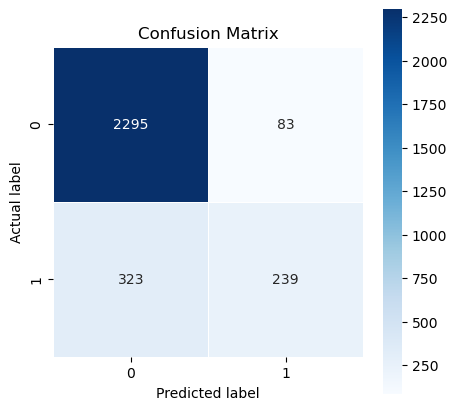

In [117]:
# ploting the confusion matrix of random forest model using heat map
plt.figure(figsize=(5,5))
sns.heatmap(data=rfc_cm, linewidths=.5, annot=True, square = True, cmap='Blues', fmt='.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [122]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


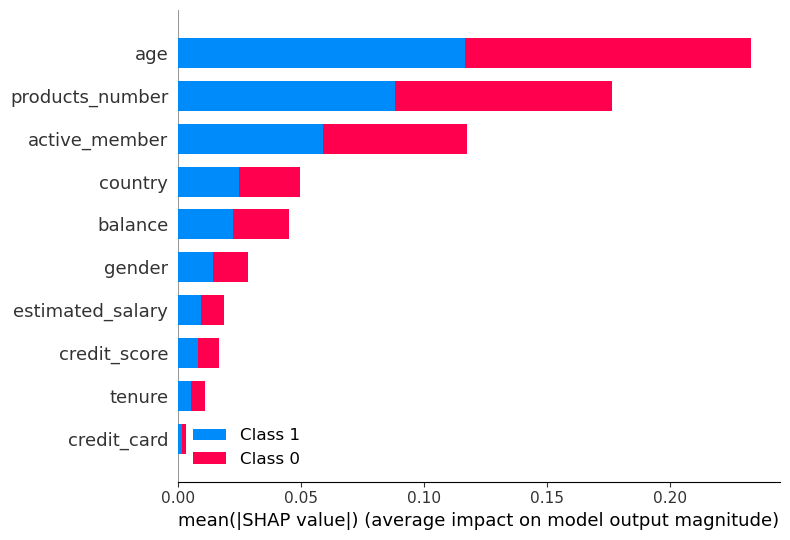

In [125]:
# importing shap library and finding the contribution of each features for the prediction
import shap
from shap import TreeExplainer
explainer = TreeExplainer(rfc)
values = explainer.shap_values(X_test)
shap.summary_plot(shap_values=values,features=X_test)

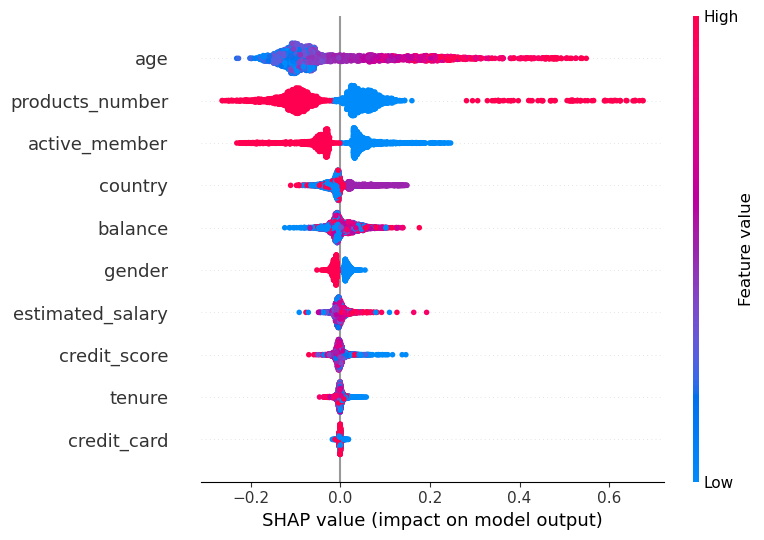

In [127]:
# knowing the contribution of datapoints in each features for the prediction
shap.summary_plot(shap_values=values[1],features=X_test.values,
                  feature_names=X_test.columns)

In [130]:
# finding the performance of the decision tree model using ROC curve
y_rfc_predict_proba = rfc.predict_proba(X_test)[:][:,1]

df_rfc_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                     pd.DataFrame(y_rfc_predict_proba, columns=['y_rfc_predict_proba'])], axis=1)

df_rfc_actual_predicted.index = y_test.index

rfc_fpr, rfc_tpr, rfc_tr = roc_curve(df_rfc_actual_predicted['y_actual'], df_rfc_actual_predicted['y_rfc_predict_proba'])

auc = roc_auc_score(df_rfc_actual_predicted['y_actual'], df_rfc_actual_predicted['y_rfc_predict_proba'])

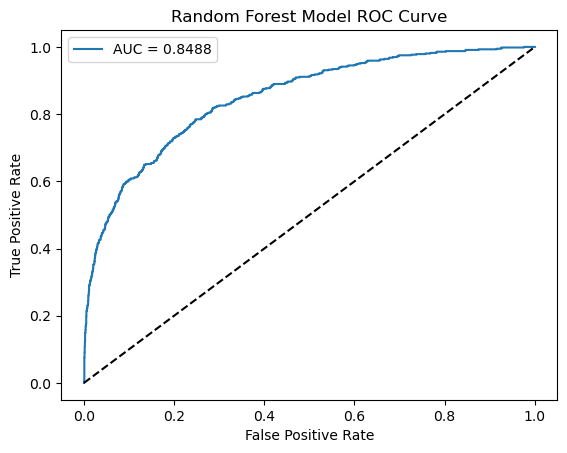

In [132]:
# ploting ROC curve of decision tree model
plt.plot(rfc_fpr, rfc_tpr, label='AUC = %0.4f' %auc)
plt.plot(rfc_fpr, rfc_fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model ROC Curve')
plt.legend()
plt.show()

##### By analysing the metrics of Decision Tree model and Random Forest model, the prediction of random forest is better than decision tree.

Metrics of Random Forest Model:
- Accuracy Sore: 0.862
- Precision Score: 0.851
- Recall Score: 0.862
- F1 Score: 0.846
- AUC: 0.848